In [23]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [24]:
#Load data
data = np.genfromtxt('./files/chungkhoan/excel_acb.csv', delimiter = ",", skip_header = 1)

In [25]:
data.shape

(3664, 14)

In [26]:
open_price = data[:,7]
close_price = data[:,10]
print(open_price)
print(close_price)

[ 36.1   35.35  36.   ... 145.   143.2  120.  ]
[ 35.55  36.    35.5  ... 138.4  134.7  130.2 ]


# Phân tích mô tả cơ bản với giá mở cửa

In [85]:
# Phân tích về sự mở rộng giá mở cửa
max_open_price = np.max(open_price)
print('Max:', np.max(open_price))

min_open_price = np.min(open_price)
print('Min:', np.min(open_price))

ran = np.ptp(open_price) # Khoảng giá trải từ min-max
print('Range:',ran)

var = np.var(open_price) # Phương sai
print("Variance:", var)

std = np.std(open_price)
print('Standard Deviation:', std) # Các giá mở cửa phân tán

Max: 300.0
Min: 14.4
Range: 285.6
Variance: 1807.5687408809354
Standard Deviation: 42.51551176783522


In [109]:
# Phân tích Khuynh tập trung giá mở cửa
print('Số phiên giao dịch:', np.count_nonzero(open_price))

mean = np.mean(open_price)
print('Mean:', np.mean(open_price))

median_open_price = np.median(open_price)
print('Median:', np.median(open_price))

#mode
count, bins = np.histogram(open_price, bins = 50)
max_count_index = np.argmax(count)
mode = (bins[max_count_index] + bins[max_count_index+1]) / 2
print('Mode: ', mode)

Số phiên giao dịch: 3664
Mean: 39.28587609170305
Median: 25.2
Mode:  17.256


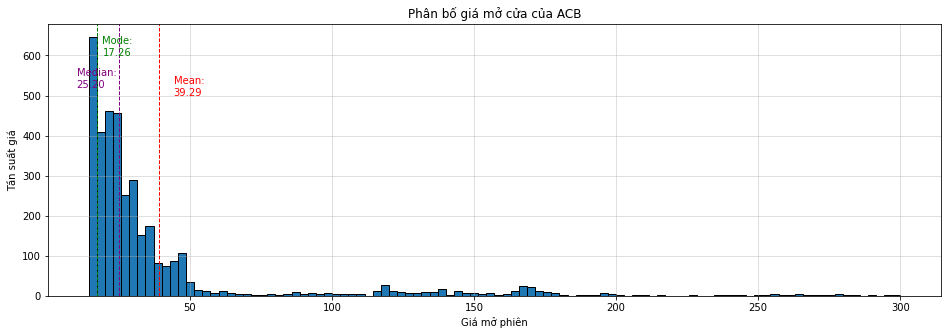

In [111]:
#Biểu đồ phân bố giá mở cửa
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price, bins = 100, edgecolor='k')

ax.axvline(mean, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean + 5, 500, f"Mean:\n{mean:.2f}", color='red')

ax.axvline(mode, color='green', linestyle = 'dashed', linewidth=1)
ax.text(mode + 2, 600, f"Mode:\n{mode:.2f}", color='green')

ax.axvline(median_open_price, color='purple', linestyle = 'dashed', linewidth=1)
ax.text(median_open_price - 15, 520, f"Median:\n{median_open_price:.2f}", color='purple')

plt.grid(alpha = 0.5)
plt.title('Phân bố giá mở cửa của ACB')
plt.ylabel('Tần suất giá')
plt.xlabel('Giá mở phiên')
plt.show()

In [93]:
# Độ phân vị
pct = np.percentile(open_price,[25,75])
qnt = np.quantile(open_price,[0.25,0.75])
print('PCT 25% - 75%:',pct)
print('QNT 0.25 - 0.75:',qnt)

PCT 25% - 75%: [19.2  35.35]
QNT 0.25 - 0.75: [19.2  35.35]


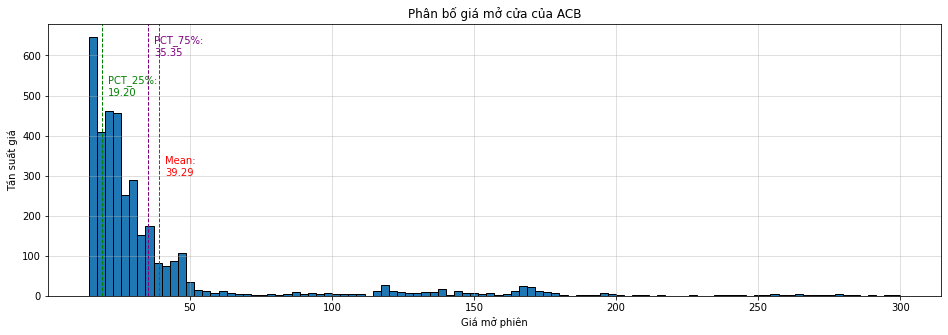

In [105]:
#Biểu đồ phân bố giá mở cửa với độ phân vị
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price, bins = 100, edgecolor='k')

ax.axvline(mean, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean + 2, 300, f"Mean:\n{mean:.2f}", color='red')

ax.axvline(pct[0], color='green', linestyle = 'dashed', linewidth=1)
ax.text(pct[0] + 2, 500, f"PCT_25%:\n{pct[0]:.2f}", color='green')

ax.axvline(pct[1], color='purple', linestyle = 'dashed', linewidth=1)
ax.text(pct[1]+ 2, 600, f"PCT_75%:\n{pct[1]:.2f}", color='purple')

plt.grid(alpha = 0.5)
plt.title('Phân bố giá mở cửa của ACB')
plt.ylabel('Tần suất giá')
plt.xlabel('Giá mở phiên')
plt.show()

 - 75% giá cổ phiếu giao dịch dưới 35.35 --> Hạn chế mua nếu giá cao hơn mức này vì có thể sau đó sẽ giảm và hiếm chỉ 25% cao hơn.
 - 50% giá cổ phiếu giao dịch trong khoảng 19.2 -35.32 --> Vùng giá này chiếm 50% tổng phiên, 
 - Giá dưới 19.2 có thể rất tốt để mua vào. --> Bán ra ở trước vùng 35.32

In [121]:
# Mức giá mở cửa Mean chiếm bao nhiêu % tổng phiên
mean_pct = np.count_nonzero(open_price[open_price<mean]) / open_price.size
print(f"Mức giá mở cửa tại Mean chiếm {mean_pct:.2%} giá mở cửa")

Mức giá mở cửa tại Mean chiếm 79.09% giá mở cửa


# Tính mức thay đổi giá mở cửa so với ngày hôm trước. Vẽ biểu đồ và thực hiện một số bước phân tích mô tả với các giá trị đó

In [151]:
open_price_change_by_date = []
max_index = len(open_price) -1
for index, price in enumerate(open_price):
    if(index == max_index):break
    open_price_change_by_date.append(round(open_price[index+1] - open_price[index],2))

open_price_change_by_date = np.array(open_price_change_by_date)

In [152]:
open_price_change_by_date

array([ -0.75,   0.65,  -0.55, ...,   5.  ,  -1.8 , -23.2 ])

In [155]:
open_price_change_by_date.shape

(3663,)

In [177]:
# Phân tích khuynh hướng tập trung
mean_change = np.mean(open_price_change_by_date)
print('Mean: ',mean_change)

median_change = np.median(open_price_change_by_date)
print('Median: ',median_change)

#mode
count_change, bins_change = np.histogram(open_price_change_by_date, bins = 50)
max_count_index_change = np.argmax(count_change)
mode_change = (bins_change[max_count_index_change] + bins_change[max_count_index_change+1]) / 2
print('Mode: ', mode_change)

Mean:  0.022904722904722907
Median:  0.0
Mode:  -0.35899999999999466


In [207]:
#Mean giá mở cửa thay đổi chiếm bao nhiêu % tổng phiên
mean_pct_change = np.count_nonzero(open_price_change_by_date[open_price_change_by_date<mean]) / open_price_change_by_date.size
print(f"Mức thay đổi giá mở cửa tại Mean chiếm {mean_pct_change:.2%} tổng phiên")

Mức thay đổi giá mở cửa tại Mean chiếm 41.85% tổng phiên


 - Tức có tới 41.85% phiên chỉ thay đổi trong khoản Mean: 0.02290
 - Gần như là mở cửa không thay đổi hoặc trong phiên giá nằm mức tham chiếu

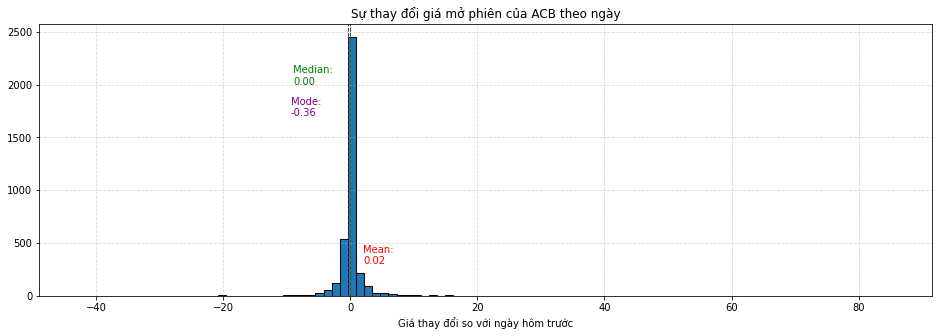

In [209]:
#Biểu đồ phân bố mức đội thay đổi giá với độ đo khuynh hướng tập trung
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price_change_by_date, bins = 100, edgecolor='k')

ax.axvline(mean_change, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean_change + 2, 300, f"Mean:\n{mean_change:.2f}", color='red')

ax.axvline(median_change, color='green', linestyle = 'dashed', linewidth=1)
ax.text(median_change - 9, 2000, f"Median:\n{median_change:.2f}", color='green')

ax.axvline(mode_change, color='purple', linestyle = 'dashed', linewidth=1)
ax.text(mode_change - 9, 1700, f"Mode:\n{mode_change:.2f}", color='purple')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá mở phiên của ACB theo ngày')
plt.xlabel('Giá thay đổi so với ngày hôm trước')
plt.show()

In [183]:
# Phân tích về sự mở rộng giá thay đổi
max_open_price_change = np.max(open_price_change_by_date)
print('Max:', max_open_price_change)

min_open_price_change = np.min(open_price_change_by_date)
print('Min:', min_open_price_change)

ran_change = np.ptp(open_price_change_by_date) # Khoảng giá trải từ min-max
print('Range:',ran_change)

var_change = np.var(open_price_change_by_date) # Phương sai
print("Variance:", var_change)

std_change = np.std(open_price_change_by_date)
print('Standard Deviation:', std_change) # Các giá mở cửa phân tán

Max: 85.2
Min: -42.5
Range: 127.7
Variance: 8.956326315519602
Standard Deviation: 2.9927122005832105


 - Mức tăng mạnh nhất so với ngày trước là 85.2
 - Mức giảm mạnh nhất so với ngày trước là -42.5
 - STD là 2.99 --> Mức độ phân tán của sự thay đổi giá theo ngày không xa giá trị Mean
 - Range là 127.7 Khoảng Min-Max

In [187]:
# Độ phân vị trong chệnh lệch giá theo ngày
pct_change = np.percentile(open_price_change_by_date,[25,75])
qnt_change = np.quantile(open_price_change_by_date,[0.25,0.75])
print('PCT 25% - 75%:',pct_change)
print('QNT 0.25 - 0.75:',qnt_change)

PCT 25% - 75%: [-0.3  0.3]
QNT 0.25 - 0.75: [-0.3  0.3]


In [203]:
# Tính Z-score của 25%
zScore_25pct = (pct_change[0]-mean_change) / std_change
print(zScore_25pct)
zScore_75pct = (pct_change[1]-mean_change) / std_change
print(zScore_75pct)

-0.10789701824378442
0.09259001819195231


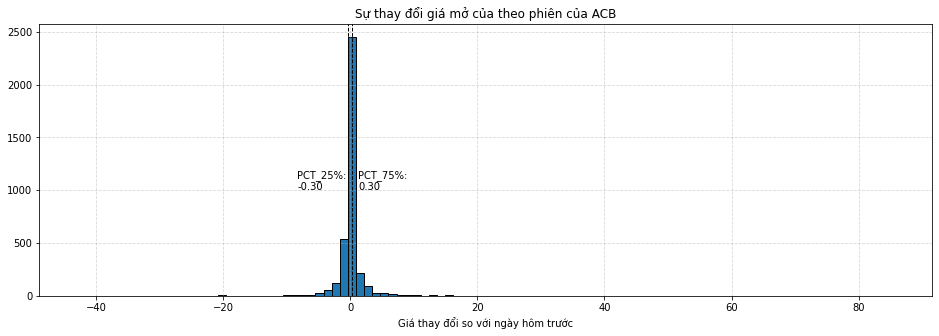

In [210]:
#Biểu đồ phân bố giá mở cửa với độ phân vị
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price_change_by_date, bins = 100, edgecolor='k')

ax.axvline(pct_change[0], color='black', linestyle = 'dashed', linewidth=1)
ax.text(pct_change[0]-8, 1000, f"PCT_25%:\n{pct_change[0]:.2f}", color='black')

ax.axvline(pct_change[1], color='black', linestyle = 'dashed', linewidth=1)
ax.text(pct_change[1]+1, 1000, f"PCT_75%:\n{pct_change[1]:.2f}", color='black')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá mở của theo phiên của ACB')
plt.xlabel('Giá thay đổi so với ngày hôm trước')
plt.show()

In [189]:
# Confidence Interval: 95%
ci95 = np.percentile(open_price_change_by_date,[2.5, 97.5])
print('Confidence Interval: 95%:',ci95)

Confidence Interval: 95%: [-4.  4.]


- 95% mức giá thay đổi trong biên độ -4 cho tới 4

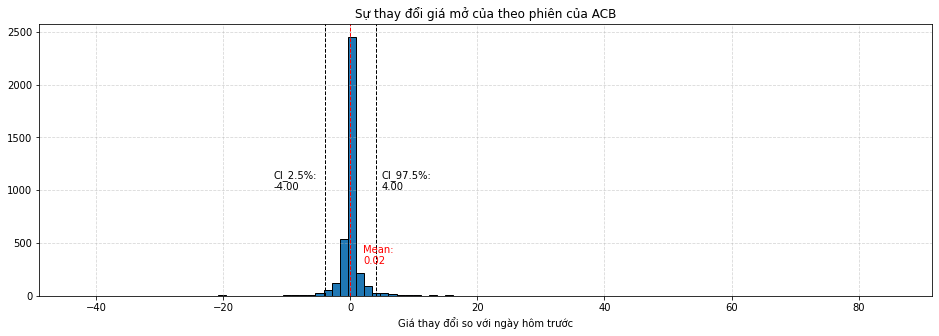

In [211]:
#Biểu đồ phân bố giá mở cửa với độ phân vị
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price_change_by_date, bins = 100, edgecolor='k')

ax.axvline(mean_change, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean_change + 2, 300, f"Mean:\n{mean_change:.2f}", color='red')

ax.axvline(ci95[0], color='black', linestyle = 'dashed', linewidth=1)
ax.text(ci95[0]-8, 1000, f"CI_2.5%:\n{ci95[0]:.2f}", color='black')

ax.axvline(ci95[1], color='black', linestyle = 'dashed', linewidth=1)
ax.text(ci95[1]+1, 1000, f"CI_97.5%:\n{ci95[1]:.2f}", color='black')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá mở của theo phiên của ACB')
plt.xlabel('Giá thay đổi so với ngày hôm trước')
plt.show()


- Phân bố chuẩn

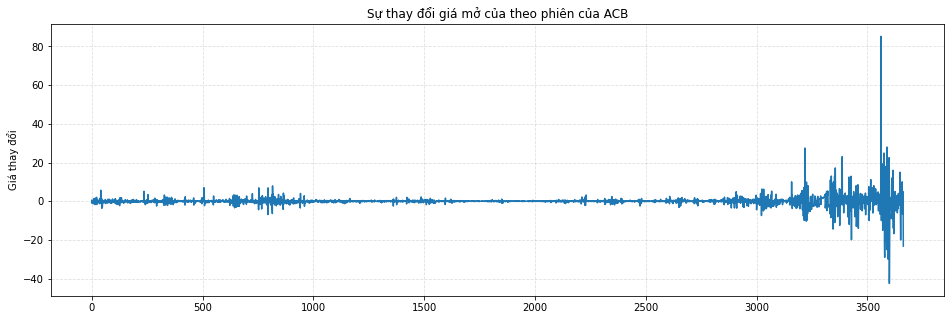

In [167]:
plt.figure(figsize=(16,5))
plt.plot(open_price_change_by_date)
plt.grid(alpha = 0.4, linestyle='dashed')
plt.title('Sự thay đổi giá mở của theo phiên của ACB')
plt.ylabel('Giá thay đổi')
plt.show()

# Skewness and Kurtosios

In [198]:
from scipy import stats

In [199]:
stats.skew(open_price_change_by_date)

5.37217159593296

- Giá trị skew > 0-- Khuynh hướng lệch trái

In [214]:
stats.kurtosis(open_price_change_by_date)

211.5019622818911

- Phân bố có độ nhọn lớn

# Khoảng giá theo ngày (Giá Đóng cửa - Giá mở cửa)

In [215]:
print(close_price)
print(open_price)

[ 35.55  36.    35.5  ... 138.4  134.7  130.2 ]
[ 36.1   35.35  36.   ... 145.   143.2  120.  ]


In [216]:
price_change_in_day = close_price - open_price
print(price_change_in_day)

[-0.55  0.65 -0.5  ... -6.6  -8.5  10.2 ]


In [217]:
price_change_in_day.shape

(3664,)

In [218]:
# Phân tích khuynh hướng tập trung
mean_change_by_day = np.mean(price_change_in_day)
print('Mean: ',mean_change_by_day)

median_change_by_day = np.median(price_change_in_day)
print('Median: ',median_change_by_day)

#mode
count_change_by_day, bins_change_by_day = np.histogram(open_price_change_by_date, bins = 50)
max_count_index_change_by_day = np.argmax(count_change_by_day)
mode_change_by_day = (bins_change_by_day[max_count_index_change_by_day] + bins_change_by_day[max_count_index_change_by_day+1]) / 2
print('Mode: ', mode_change_by_day)

Mean:  -0.14010644104803496
Median:  0.0
Mode:  -0.35899999999999466


In [220]:
#Mean giá thay đổi theo ngày chiếm bao nhiêu % tổng phiên
mean_pct_change_by_date = np.count_nonzero(price_change_in_day[price_change_in_day<mean]) / price_change_in_day.size
print(f"Mức thay đổi giá theo ngày tại Mean chiếm {mean_pct_change_by_date:.2%} tổng phiên")

Mức thay đổi giá theo ngày tại Mean chiếm 43.07% tổng phiên


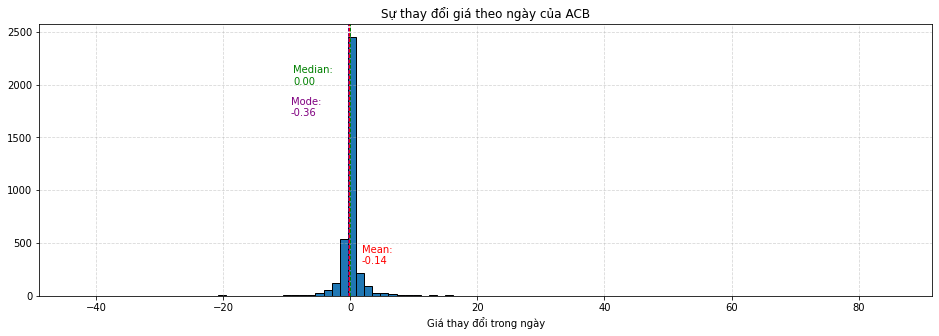

In [221]:
#Biểu đồ phân bố mức đội thay đổi giá với độ đo khuynh hướng tập trung
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(open_price_change_by_date, bins = 100, edgecolor='k')

ax.axvline(mean_change_by_day, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean_change_by_day + 2, 300, f"Mean:\n{mean_change_by_day:.2f}", color='red')

ax.axvline(median_change_by_day, color='green', linestyle = 'dashed', linewidth=1)
ax.text(median_change_by_day - 9, 2000, f"Median:\n{median_change_by_day:.2f}", color='green')

ax.axvline(mode_change_by_day, color='purple', linestyle = 'dashed', linewidth=1)
ax.text(mode_change_by_day - 9, 1700, f"Mode:\n{mode_change_by_day:.2f}", color='purple')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá theo ngày của ACB')
plt.xlabel('Giá thay đổi trong ngày')
plt.show()

In [219]:
# Phân tích về sự mở rộng giá mở cửa
max_price_change = np.max(price_change_in_day)
print('Max:', max_price_change)

min_price_change = np.min(price_change_in_day)
print('Min:', min_price_change)

ran_price_change = np.ptp(price_change_in_day) # Khoảng giá trải từ min-max
print('Range:',ran_price_change)

var_price_change = np.var(price_change_in_day) # Phương sai
print("Variance:", var_price_change)

std_price_change = np.std(price_change_in_day)
print('Standard Deviation:', std_price_change) # Các giá mở cửa phân tán

Max: 25.900000000000006
Min: -30.0
Range: 55.900000000000006
Variance: 4.585975398058949
Standard Deviation: 2.141489060924419


 - Mức tăng mạnh nhất trong ngày là 25.9
 - Mức giảm mạnh nhất trong ngày là -30
 - STD là 2.14 --> Mức độ phân tán của sự thay đổi giá trong ngày không xa giá trị Mean
 - Range là 55.9 Khoảng Min-Max

In [222]:
# Độ phân vị trong chệnh lệch giá theo ngày
pct_change_date = np.percentile(price_change_in_day,[25,75])
qnt_change_date = np.quantile(price_change_in_day,[0.25,0.75])
print('PCT 25% - 75%:',pct_change_date)
print('QNT 0.25 - 0.75:',qnt_change_date)

PCT 25% - 75%: [-0.25  0.2 ]
QNT 0.25 - 0.75: [-0.25  0.2 ]


In [223]:
# Tính Z-score của 25%
zScore_25pct = (pct_change_date[0]-mean_change_by_day) / std_price_change
print(zScore_25pct)
zScore_75pct = (pct_change_date[1]-mean_change_by_day) / std_price_change
print(zScore_75pct)

-0.05131642321092556
0.15881773446987402


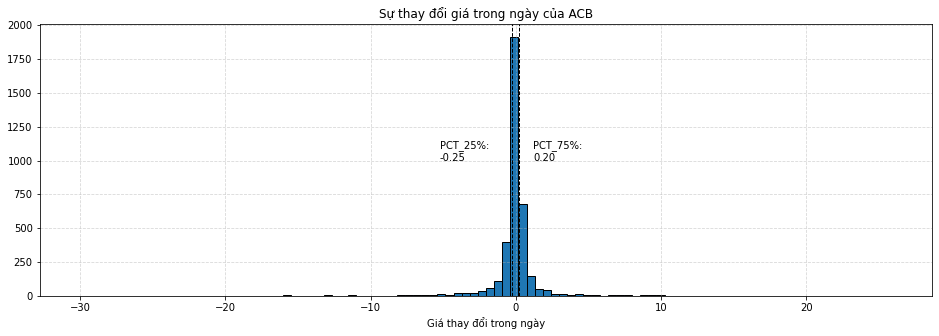

In [228]:
#Biểu đồ phân bố giá mở cửa với độ phân vị
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(price_change_in_day, bins = 100, edgecolor='k')

ax.axvline(pct_change_date[0], color='black', linestyle = 'dashed', linewidth=1)
ax.text(pct_change_date[0]-5, 1000, f"PCT_25%:\n{pct_change_date[0]:.2f}", color='black')

ax.axvline(pct_change_date[1], color='black', linestyle = 'dashed', linewidth=1)
ax.text(pct_change_date[1]+1, 1000, f"PCT_75%:\n{pct_change_date[1]:.2f}", color='black')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá trong ngày của ACB')
plt.xlabel('Giá thay đổi trong ngày')
plt.show()

In [225]:
# Confidence Interval: 95%
ci95 = np.percentile(price_change_in_day,[2.5, 97.5])
print('Confidence Interval: 95%:',ci95)

Confidence Interval: 95%: [-3.8  2.3]


- 95% mức giá thay đổi trong biên độ -3.8 cho tới 2.3

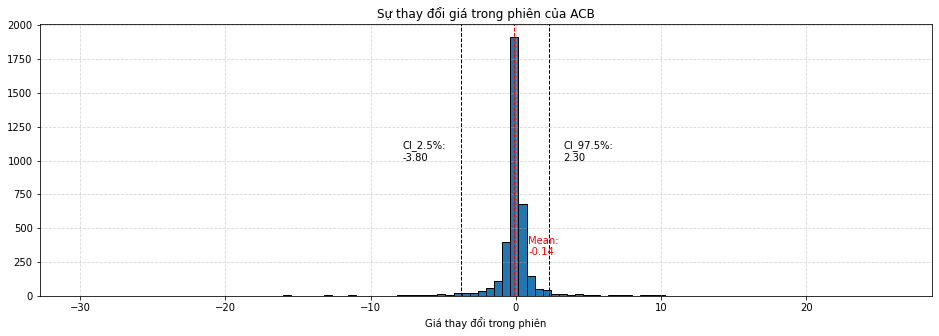

In [230]:
#Biểu đồ phân bố giá mở cửa với độ phân vị
fig,ax = plt.subplots(figsize = (16,5))
ax.hist(price_change_in_day, bins = 100, edgecolor='k')

ax.axvline(mean_change_by_day, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean_change_by_day + 1, 300, f"Mean:\n{mean_change_by_day:.2f}", color='red')

ax.axvline(ci95[0], color='black', linestyle = 'dashed', linewidth=1)
ax.text(ci95[0]-4, 1000, f"CI_2.5%:\n{ci95[0]:.2f}", color='black')

ax.axvline(ci95[1], color='black', linestyle = 'dashed', linewidth=1)
ax.text(ci95[1]+1, 1000, f"CI_97.5%:\n{ci95[1]:.2f}", color='black')

plt.grid(alpha = 0.5,linestyle='dashed')
plt.title('Sự thay đổi giá trong phiên của ACB')
plt.xlabel('Giá thay đổi trong phiên')
plt.show()

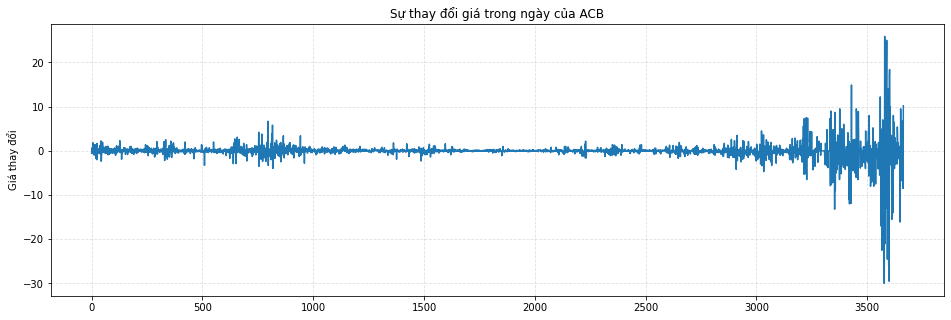

In [231]:
plt.figure(figsize=(16,5))
plt.plot(price_change_in_day)
plt.grid(alpha = 0.4, linestyle='dashed')
plt.title('Sự thay đổi giá trong ngày của ACB')
plt.ylabel('Giá thay đổi')
plt.show()

# Skewness and Kurtosios

In [232]:
stats.skew(price_change_in_day)

-2.8230505828772965

Giá trị skew < 0-- Khuynh hướng lệch phải

In [233]:
stats.kurtosis(price_change_in_day)

63.94974084704613

- Phân bố có độ nhọn lớn